# This is a free space to explore new libs and ideas 😋

In [87]:
#Q1:
#base class
class GeneralNeuron:
#adding to the general neuron its attributes
    def __init__(self, firing_rate):
        self.firing_rate=firing_rate
    def activate():
#adding the general neuron its function
        pass
#intermediate class
class SensoryNeuron(GeneralNeuron):
#adding to the sensory neuron its attributes
    def __init__(self, firing_rate, receptor_type):
        super().__init__()
        self.receptor_type=receptor_type
        self.firing_rate=firing_rate
    def sense_stimulus():
    #adding the sensory neuron its function
        pass

# another intermediate class
class MotorNeron(GeneralNeuron):
#adding to the motor neuron its attributes
    def __init__(self,firing_rate, target_muscle):
        super().__init__()
        self.firing_rate=firing_rate
        self.target_muscle=target_muscle
    
    def control_muscle():
#adding the motor neuron its function
        pass

# leaf class
class Potoreceptor(SensoryNeuron):
#adding to the potoreceptor its attributes
    def __init__(self,firing_rate):
        self.firing_rate=firing_rate
        self.receptor_type="light"
    def light_detection():
    #adding to the potoreceptor its function to make that he has unique response to light
        pass
   
# another leaf class
class Mechanoreceptor(SensoryNeuron):
#adding to the mechanoreceptor its attributes
    def __init__(self,firing_rate):
        self.firing_rate=firing_rate
        self.receptor_type="pressure"
    def pressure_detection():
#adding to the mechanoreceptor its function to make that he has unique response to pressure        
        pass

# another leaf class
class AlphaMotorNeuron(MotorNeron):
#adding to the alpha motor neuron its attributes
    def __init__(self,firing_rate):
        self.firing_rate=firing_rate
        self.target_muscle="skeletal muscle"
    def Skeletal_Muscle_Control():
    #adding to the alpha motor neuron its function so he works specific to skeletal muscle
        pass

# another leaf class
class GammaMotorNeuron(MotorNeron):
#adding to the gamma motor neuron its attributes
    def __init__(self,firing_rate):
        self.firing_rate=firing_rate
        self.target_muscle="muscle spindle"
    def Muscle_Spindle_Control():
    #adding to the alpha motor neuron its function so he has unique control mechanism      
        pass   





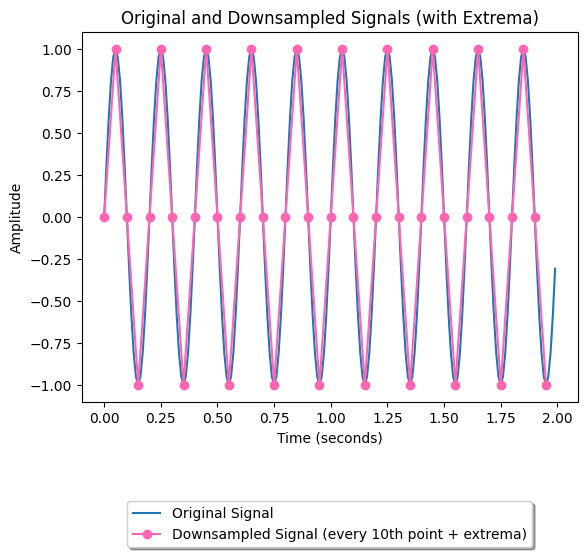

In [101]:
#Q2:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# the signal parameters
frequency = 5
sampling_interval = 0.01
duration = 2

# create an array of time 
t = np.arange(0, duration, sampling_interval)

# create a sinusoidal wave
signal = np.sin(2 * np.pi * frequency * t)

# function to downsample the signal 
def downsample_signal_with_extrema(signal, step=10):

    maxima_indices = np.where((signal[:-2] < signal[1:-1]) & (signal[1:-1] > signal[2:]))[0] + 1
    minima_indices = np.where((signal[:-2] > signal[1:-1]) & (signal[1:-1] < signal[2:]))[0] + 1
    
   
    extrema_indices = np.sort(np.concatenate((maxima_indices, minima_indices)))

    downsampled_indices = np.arange(0, len(signal), step)

    
    all_indices = np.sort(np.concatenate((extrema_indices, downsampled_indices)))

    downsampled_signal = signal[all_indices]
    downsampled_t = t[all_indices]  

    return downsampled_signal, downsampled_t

# Call the downsampling function every 10 points and maxima & minima
downsampled_signal, downsampled_t = downsample_signal_with_extrema(signal, step=10)

#presenting of all required data
plt.plot(t, signal, label='Original Signal', color='#1f77b4') 
plt.plot(downsampled_t, downsampled_signal, label='Downsampled Signal (every 10th point + extrema)', color='#FF66B2', marker='o')  


plt.title("Original and Downsampled Signals (with Extrema)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, fancybox=True)


plt.show()


    



In [ ]:
#Q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('laptop_price - dataset.csv')


df['OpSys'] = df['OpSys'].str.strip().str.lower()  


df_sorted = df.sort_values(by='Price (Euro)', ascending=False)


plt.figure(figsize=(20, 10)) 


plt.bar(df_sorted['Product'], df_sorted['Price (Euro)'], color='black', edgecolor='black', width=0.3)  


plt.title('Laptop Prices', fontsize=20) 
plt.xlabel('Laptop Model (Product)', fontsize=16)  
plt.ylabel('Price (Euro)', fontsize=16)  


plt.xticks(rotation=90, ha='center', fontsize=10)  


plt.tight_layout()  


plt.show()


####
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)


highest_avg_price_company = avg_price_by_company.idxmax()
highest_avg_price = avg_price_by_company.max()


plt.figure(figsize=(16, 8))  


bars = plt.bar(avg_price_by_company.index, avg_price_by_company.values, color='#8a2be2', edgecolor='black', width=0.6)  # צבע סגול לילך

for bar in bars:
    if bar.get_height() == highest_avg_price:
        bar.set_color('red') 


plt.title('Average Laptop Prices by Company', fontsize=20)  
plt.xlabel('Company', fontsize=16) 
plt.ylabel('Average Price (Euro)', fontsize=16)  


plt.xticks(rotation=45, ha='right', fontsize=12)  


plt.tight_layout()  


plt.show()

#####
print(f"The company with the highest average price is {highest_avg_price_company} with an average price of {highest_avg_price:.2f} Euro.")



unique_opsys = df['OpSys'].unique()  

for op_sys in unique_opsys:  
    
    op_sys_df = df[df['OpSys'] == op_sys]
    
    
    plt.figure(figsize=(8, 6)) 
    plt.hist(op_sys_df['Price (Euro)'], bins=30, color='#66CDAA', edgecolor='black')  
    
   
    plt.title(f'Price Distribution of {op_sys.capitalize()}', fontsize=16)  
    plt.xlabel('Price (Euro)', fontsize=14)  
    plt.ylabel('Number of Laptops', fontsize=14)  
    
   
    plt.tight_layout()  
    plt.show()

#######
plt.figure(figsize=(10, 6))  


plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='#FFA500', edgecolor='black')


slope, intercept = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)


plt.plot(df['RAM (GB)'], slope * df['RAM (GB)'] + intercept, color='magenta', linewidth=2)


plt.title('Relationship between Price and RAM', fontsize=16)  
plt.xlabel('RAM (GB)', fontsize=14)  
plt.ylabel('Price (Euro)', fontsize=14) 


plt.tight_layout()  
plt.show()


##########
def extract_storage_type(memory):
  
    storage_types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
    
    
    types_found = [storage for storage in storage_types if storage in memory]
    
    
    return ' + '.join(types_found)

df['Storage Type'] = df['Memory'].apply(extract_storage_type)


df_storage = df[['Memory', 'Storage Type']].copy()


df_storage.index.name = 'Index'  


pd.set_option('display.max_rows', None)  
print(df_storage)  




In [ ]:
#bonus
# first question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('laptop_price - dataset.csv')


min_price_row = df.loc[df['Price (Euro)'].idxmin()]  
min_weight_row = df.loc[df['Weight (kg)'].idxmin()]  


cheapest_laptop = min_price_row['Product']
cheapest_price = min_price_row['Price (Euro)']
cheapest_weight = min_price_row['Weight (kg)']

lightest_laptop = min_weight_row['Product']
lightest_price = min_weight_row['Price (Euro)']
lightest_weight = min_weight_row['Weight (kg)']


print(f"Cheapest Laptop: {cheapest_laptop} - Price: {cheapest_price} Euro, Weight: {cheapest_weight} kg")
print(f"Lightest Laptop: {lightest_laptop} - Price: {lightest_price} Euro, Weight: {lightest_weight} kg")

avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)


plt.figure(figsize=(16, 8))  
bars = plt.bar(avg_price_by_company.index, avg_price_by_company.values, color='#8a2be2', edgecolor='black', width=0.6)  


plt.scatter(min_price_row['Company'], cheapest_price, color='red', s=100, marker='^', label=f"Cheapest Laptop: {cheapest_laptop} ({cheapest_price} Euro)")


plt.title('Average Prices by Company', fontsize=20)  
plt.xlabel('Company', fontsize=16)  
plt.ylabel('Average Price (Euro)', fontsize=16)  


plt.xticks(rotation=45, ha='right', fontsize=12)  


plt.tight_layout()  


plt.legend()
plt.show()



avg_weight_by_company = df.groupby('Company')['Weight (kg)'].mean().sort_values(ascending=False)


plt.figure(figsize=(16, 8))  
bars = plt.bar(avg_weight_by_company.index, avg_weight_by_company.values, color='#66CDAA', edgecolor='black', width=0.6)  # צבע ירוק מרווה


plt.scatter(min_weight_row['Company'], lightest_weight, color='red', s=100, marker='^', label=f"Lightest Laptop: {lightest_laptop} ({lightest_weight} kg)")


plt.title('Average Weights by Company', fontsize=20)  
plt.xlabel('Company', fontsize=16) 
plt.ylabel('Average Weight (kg)', fontsize=16)  


plt.xticks(rotation=45, ha='right', fontsize=12)  


plt.tight_layout()  


plt.legend()
plt.show()



companies = df['Company'].unique()
colors = plt.cm.get_cmap('tab20', len(companies))  


plt.figure(figsize=(10, 6))


for i, company in enumerate(companies):
    company_data = df[df['Company'] == company]
    plt.scatter(company_data['Weight (kg)'], company_data['Price (Euro)'], color=colors(i), label=company, edgecolors='black', alpha=0.6)


plt.scatter(lightest_weight, cheapest_price, color='red', s=150, edgecolor='black', marker='^', label=f"Cheapest & Lightest Laptop")


plt.title('Price vs Weight by Company', fontsize=16)  
plt.xlabel('Weight (kg)', fontsize=14)  
plt.ylabel('Price (Euro)', fontsize=14)  


plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


plt.tight_layout()  
plt.show()




In [ ]:
#bonus
#second question
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('laptop_price - dataset.csv')



min_weight_laptops = df.loc[df.groupby('Inches')['Weight (kg)'].idxmin()]


companies = df['Company'].unique()
colors = plt.cm.get_cmap('tab20', len(companies))  

plt.figure(figsize=(10, 6))


for i, company in enumerate(companies):
    company_data = df[df['Company'] == company]
    plt.scatter(company_data['Inches'], company_data['Weight (kg)'], color=colors(i), label=company, edgecolors='black', alpha=0.6)


for i, row in min_weight_laptops.iterrows():
    plt.scatter(row['Inches'], row['Weight (kg)'], color='red', edgecolors='black', s=100, marker='^', 
                label=f"{row['Company']} - {row['Product']}\nScreen: {row['Inches']}\" Weight: {row['Weight (kg)']}kg")


plt.title('Weights by Screen Size', fontsize=16) 
plt.xlabel('Screen Size (Inches)', fontsize=14) 
plt.ylabel('Weight (kg)', fontsize=14)  


plt.legend(title='Company and Product', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


plt.tight_layout()  
plt.show()


for i, row in min_weight_laptops.iterrows():
    print(f"Laptop with the lowest weight for screen size {row['Inches']} inches:")
    print(f"Company: {row['Company']}")
    print(f"Product: {row['Product']}")
    print(f"Weight: {row['Weight (kg)']} kg")
    print(f"Price: {row['Price (Euro)']} Euro")
    print("-" * 50)

